In [28]:
from sklearn.model_selection import train_test_split  #modulo para importar training and validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [21]:
ds_cancer = load_breast_cancer()

X_train:  (426, 30)
Y_train:  (426,)
X_test:  (143, 30)
Y_test:  (143,)


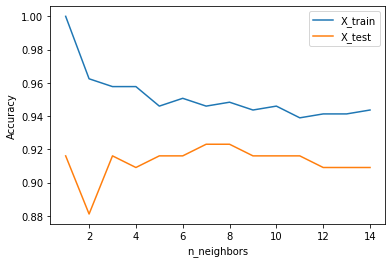

In [22]:
train_acc = []
test_acc = []

X_train,X_test, Y_train,  Y_test = train_test_split(ds_cancer.data, ds_cancer.target,stratify = ds_cancer.target, random_state = 0)

print("X_train: ",X_train.shape)
print("Y_train: ",Y_train.shape)
print("X_test: ",X_test.shape)
print("Y_test: ",Y_test.shape)


k_range = range(1,15)

for i in k_range:
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train,Y_train)

  train_acc.append(knn.score(X_train,Y_train))
  test_acc.append(knn.score(X_test,Y_test))


plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

plt.plot(k_range, train_acc, label = "X_train" )
plt.plot(k_range, test_acc, label = "X_test")
plt.legend()

Confusion matrix [[47  6]
 [ 6 84]]


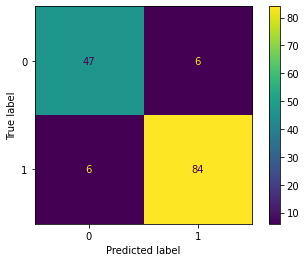

In [32]:
knn = KNeighborsClassifier(n_neighbors= 6)

knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)
 
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix",cm)

plot_confusion_matrix(knn,X_test, Y_test)